<a href="https://colab.research.google.com/github/lala991204/pandas/blob/master/4_18_matplotlib_secondary_y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

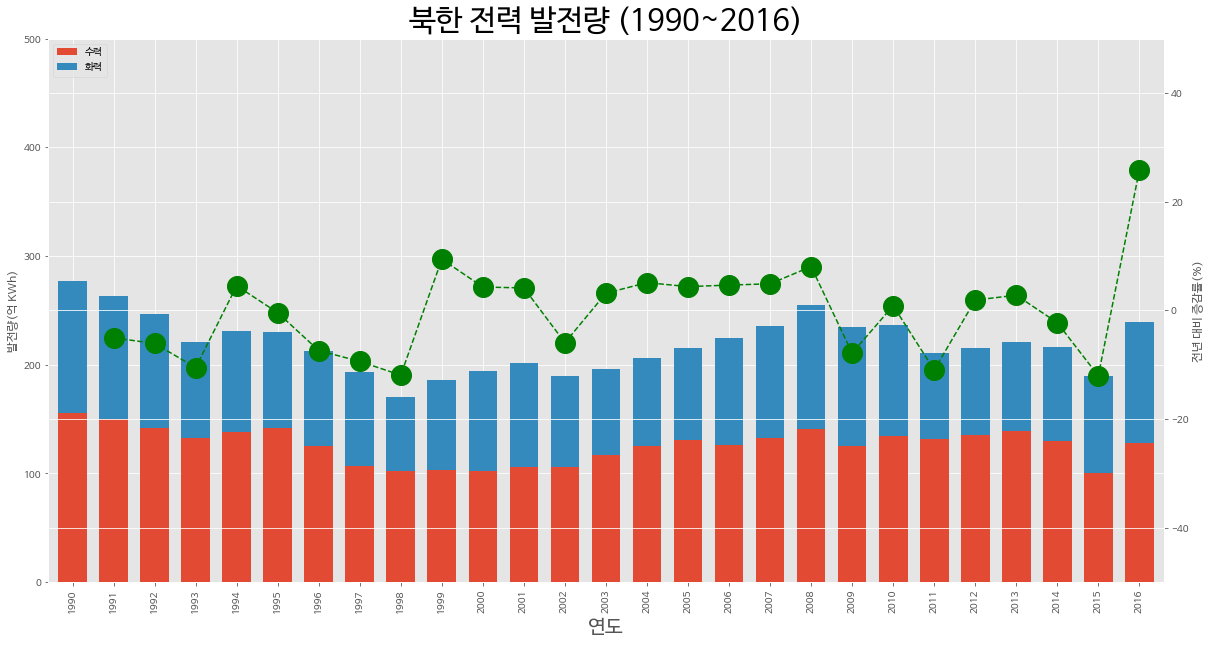

In [12]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')                             # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False            # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/pandas/남북한발전전력량.xlsx', engine='openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop(['전력량 (억㎾h)'], axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

# 증감률(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift()
df['증감률'] = ((df['총발전량']/df['총발전량 - 1년']) - 1) * 100

# 2축 그래프 그리기
ax1 = df[['수력', '화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--', marker='o', markersize=20,
         color='green', label='전년대비 증감률(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량 (1990~2016)', size=30)
ax1.legend(loc='upper left')

plt.show()